Part A
Context
In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

Objective
A renowned credit rating organization wants to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, the organization aims to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, the organization foresees facilitating the following with the help of the tool:

Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.
Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.
As a part of the data science team in the organization, you have been provided with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will default on its debt repayments in the next two quarters. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

Data Dictionary
The data consists of financial metrics from the balance sheets of different companies. The detailed data dictionary is available in the data dictionary file (FRA_DataDictionary.xlsx).

 

In [1]:
import numpy as np                     # Importing NumPy library as np
import pandas as pd                    # Importing Pandas library as pd
import matplotlib.pyplot as plt        # Importing Matplotlib's pyplot module as plt
import seaborn as sns                  # Importing Seaborn library as sns

from sklearn import tree               # Importing tree module from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier  # Importing DecisionTreeClassifier from Scikit-Learn's tree module
from sklearn.ensemble import RandomForestClassifier  # Importing RandomForestClassifier from Scikit-Learn's ensemble module
from sklearn.neural_network import MLPClassifier     # Importing MLPClassifier (Multi-layer Perceptron Classifier) from Scikit-Learn's neural_network module
from sklearn.model_selection import train_test_split # Importing train_test_split from Scikit-Learn's model_selection module
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix  # Importing specific metrics and tools from Scikit-Learn's metrics module
from sklearn.preprocessing import StandardScaler   # Importing StandardScaler from Scikit-Learn's preprocessing module
from sklearn.model_selection import GridSearchCV   # Importing GridSearchCV from Scikit-Learn's model_selection module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Importing LinearDiscriminantAnalysis from Scikit-Learn's discriminant_analysis module
from sklearn.metrics import confusion_matrix   # Importing confusion_matrix from Scikit-Learn's metrics module
from sklearn.preprocessing import scale        # Importing scale from Scikit-Learn's preprocessing module
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression from Scikit-Learn's linear_model module

In [7]:
df=pd.read_excel('D:/Ment Class/Practise11/Excel Data/TSF/PowerBI/DWNLDS/CV/MRA Project/MRA Project/XLSX File for practice/df.xlsx')

In [8]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [9]:
df.drop(['Co_Code'], axis= 1, inplace= True)


In [10]:
df.head()

,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [11]:
import matplotlib.pyplot as plt        
import seaborn as sns      

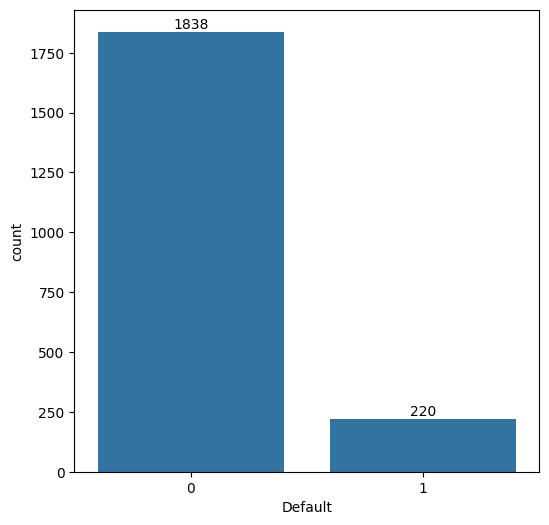

In [12]:
plt.figure(figsize = (6,6))
ax= sns.countplot(x="Default",data=df)
for label in ax.containers:
    ax.bar_label(label)
plt.show();

In [13]:
df.skew(axis=0, numeric_only=True)


_Operating_Expense_Rate                               1.221254
_Research_and_development_expense_rate                1.986001
_Cash_flow_rate                                       4.711492
_Interest_bearing_debt_interest_rate                  8.666591
_Tax_rate_A                                           1.997862
_Cash_Flow_Per_Share                                 -0.677316
_Per_Share_Net_profit_before_tax_Yuan_                6.819708
_Realized_Sales_Gross_Profit_Growth_Rate             44.463130
_Operating_Profit_Growth_Rate                        11.035758
_Continuous_Net_Profit_Growth_Rate                  -32.528808
_Total_Asset_Growth_Rate                             -0.810379
_Net_Value_Growth_Rate                               44.108614
_Total_Asset_Return_Growth_Rate_Ratio                29.695252
_Cash_Reinvestment_perc                               4.421609
_Current_Ratio                                       45.365185
_Quick_Ratio                                         17

In [14]:
import matplotlib.pyplot as plt        
import seaborn as sns      

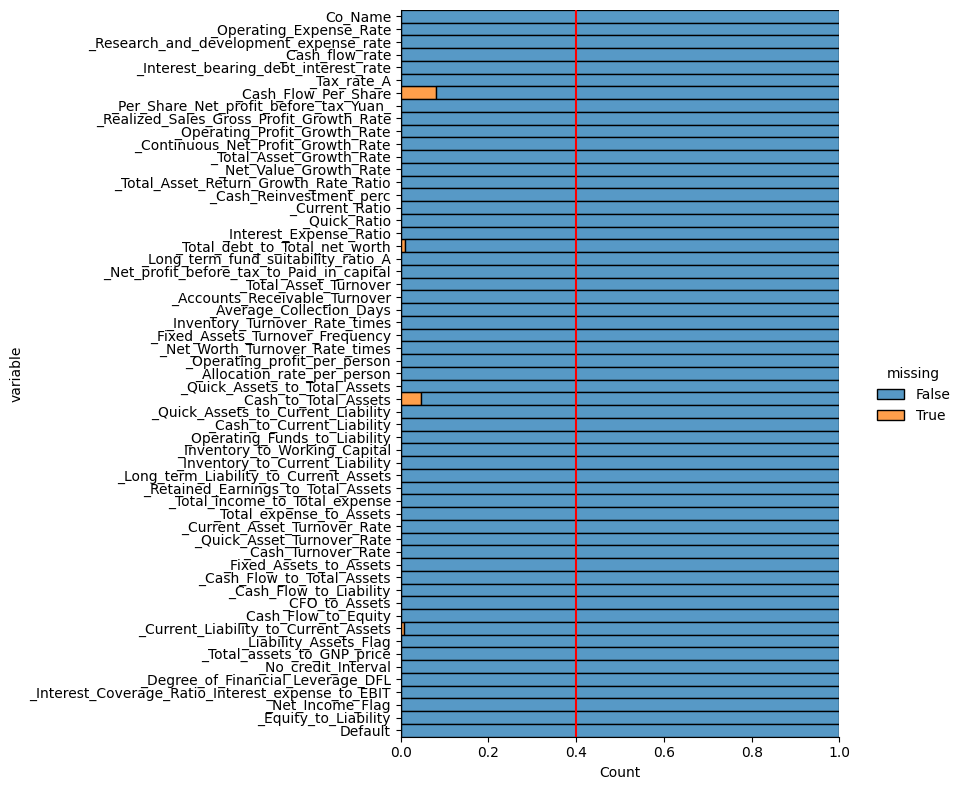

In [15]:
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

In [16]:
df.drop(['Co_Name'], axis= 1, inplace= True)


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
col=list(df)
df = pd.DataFrame(imputer.fit_transform(df))
df.columns=col
df.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,...,0.310901,0.034913,0.0,0.028801,0.620927,0.026930,0.565744,1.0,0.015338,0.0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,...,0.314572,0.041653,0.0,0.006191,0.622513,0.026297,0.560741,1.0,0.029445,1.0
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,...,0.314777,0.033560,0.0,0.001095,0.623749,0.027276,0.566744,1.0,0.041718,0.0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,...,0.316974,0.016527,0.0,0.003749,0.622963,0.026988,0.565950,1.0,0.026956,0.0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,...,0.317729,0.034497,0.0,0.006595,0.624419,0.027498,0.567177,1.0,0.019900,0.0


In [18]:
df.isnull().sum()


_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

In [21]:
pip install missingno


In [25]:
import matplotlib.pyplot as plt        
import seaborn as sns



In [26]:
import missingno as msno


<Axes: >

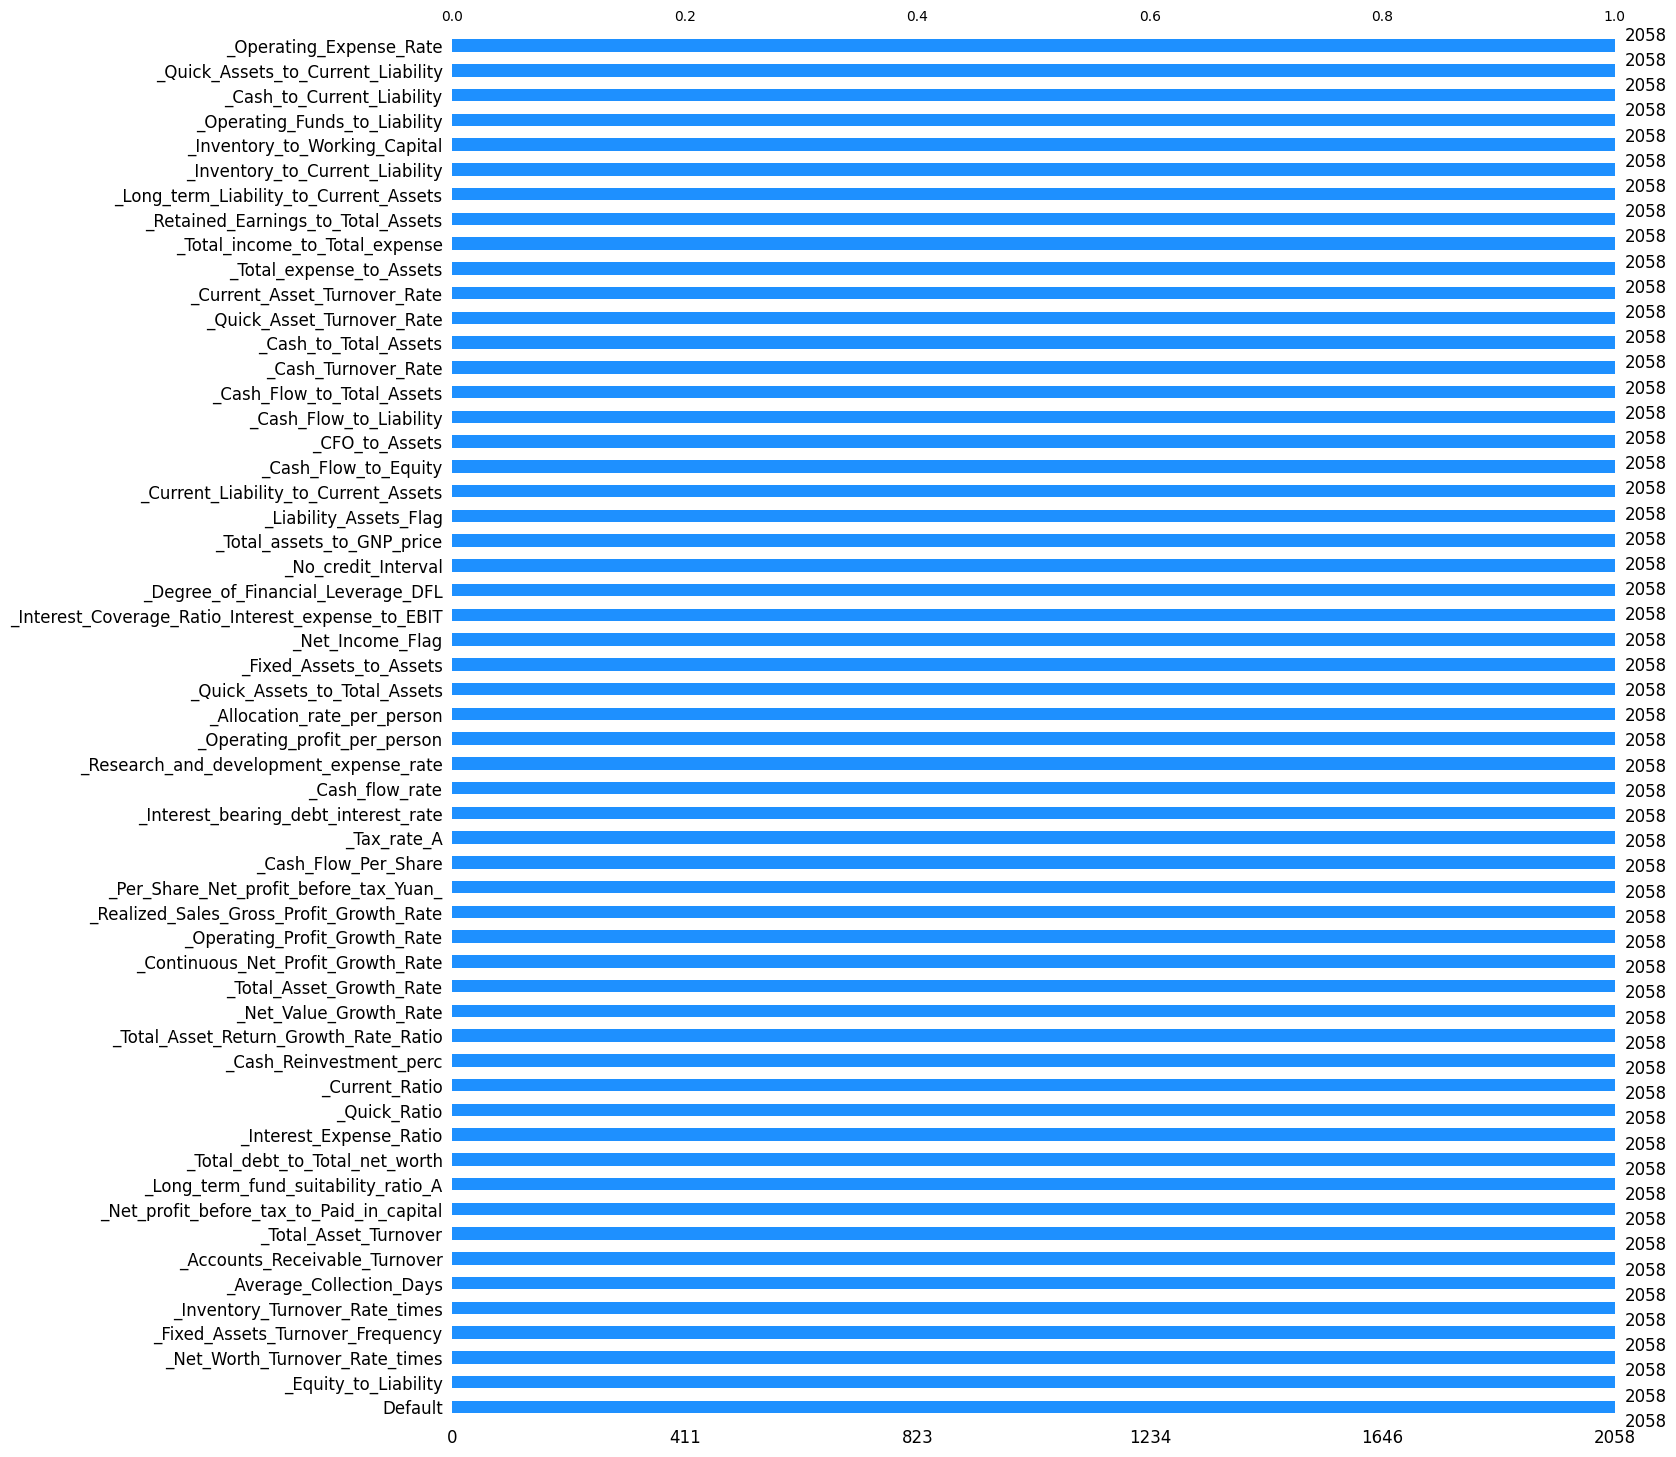

In [27]:
msno.bar(df, sort="descending", figsize=(15, 18), color="dodgerblue", fontsize=12)


Outlier treatment

In [28]:
df_X = df.drop('Default', axis=1)
df_Y = df['Default']

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
    

In [30]:
for column in df_X.columns:
    lower_range,upper_range = remove_outlier(df_X[column])
    df_X[column]= np.where(df_X[column]>upper_range, upper_range ,df_X[column])
    df_X[column]= np.where(df_X[column]<lower_range, lower_range ,df_X[column])

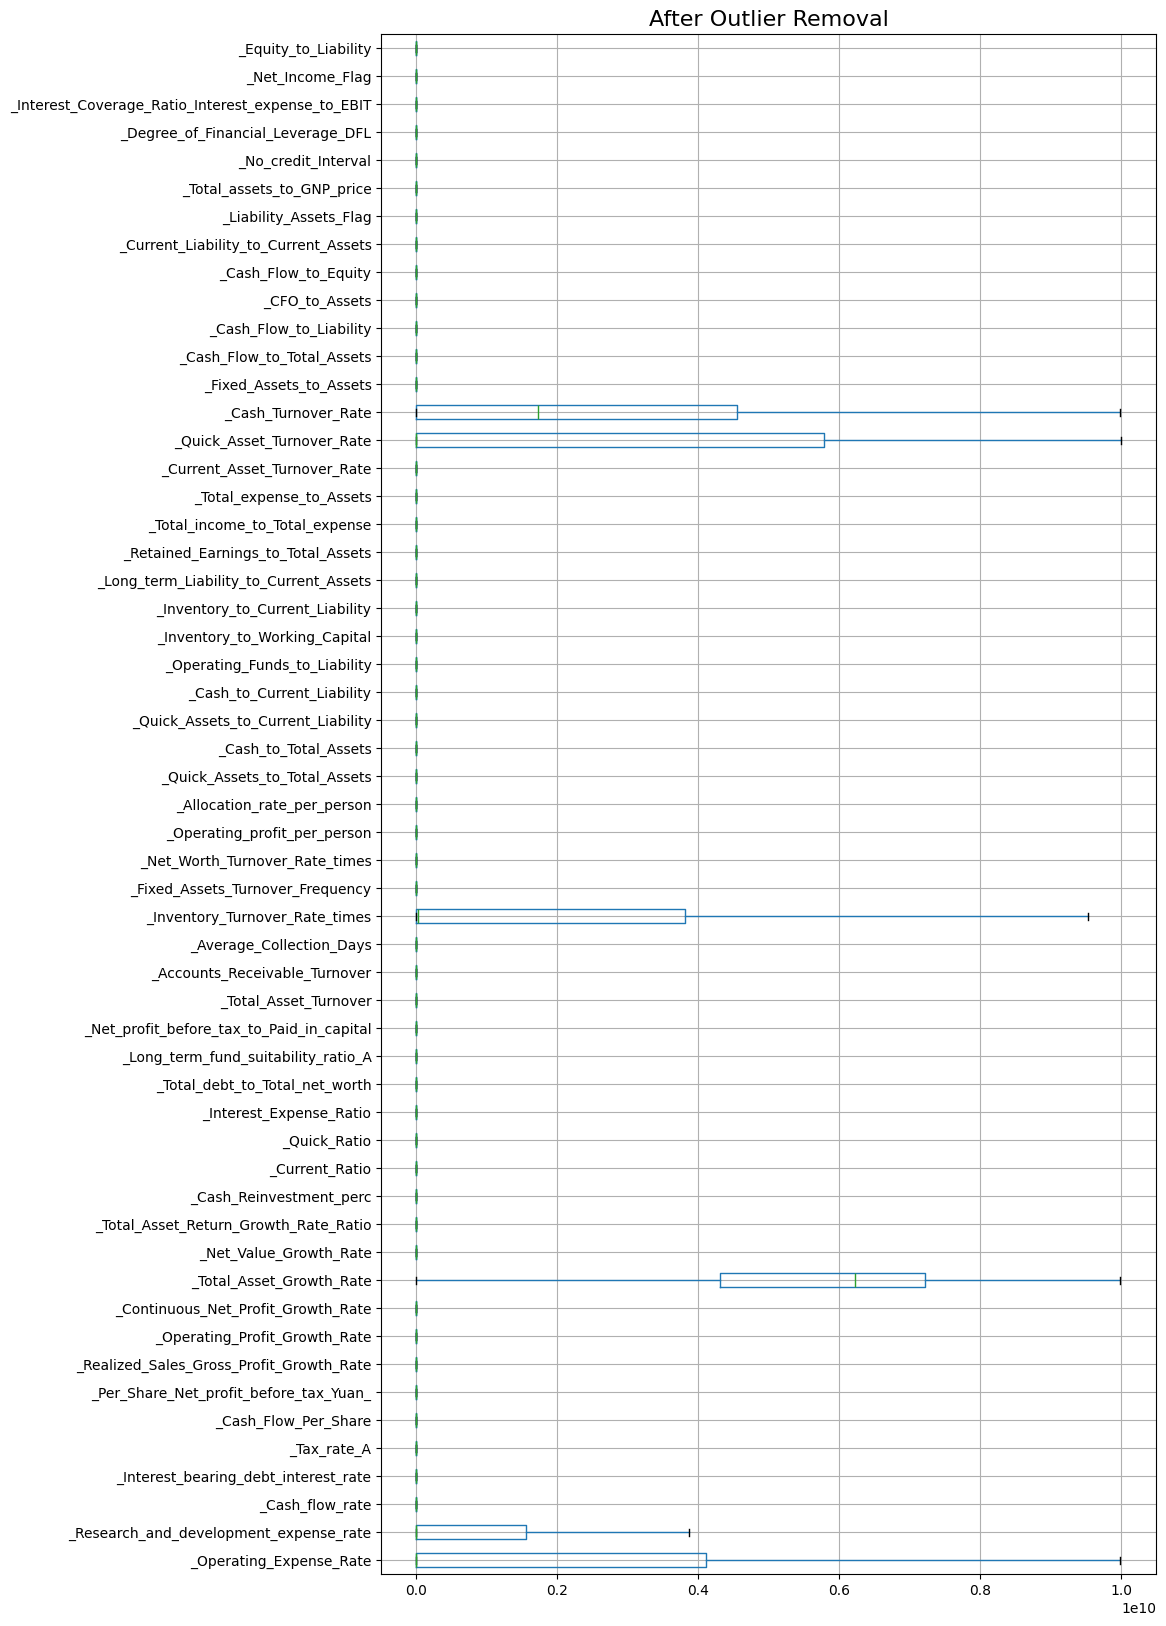

In [31]:
plt.figure(figsize=(10,20))
df_X.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [38]:
LDA = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')


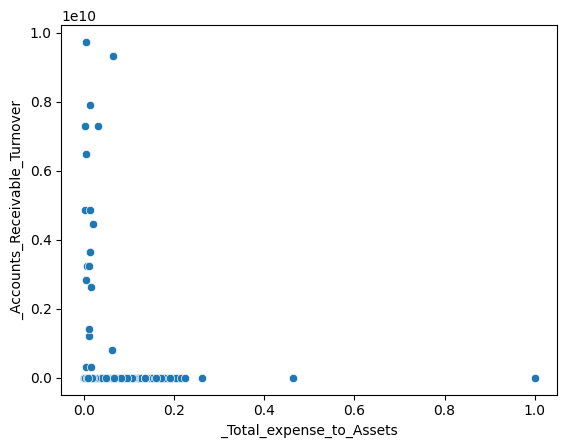

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.scatterplot(x=df["_Total_expense_to_Assets"], y=df["_Accounts_Receivable_Turnover"])
plt.show()

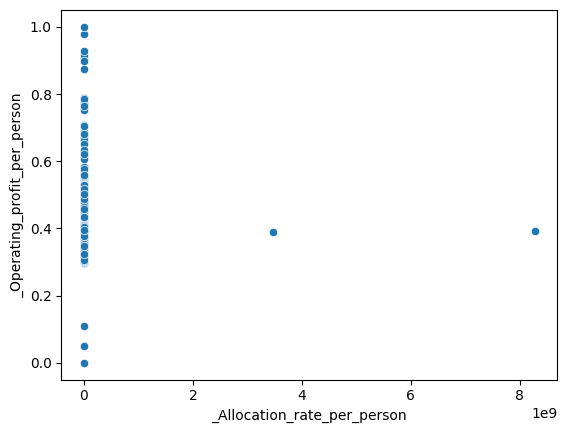

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.scatterplot(x=df["_Allocation_rate_per_person"], y=df["_Operating_profit_per_person"])
plt.show()

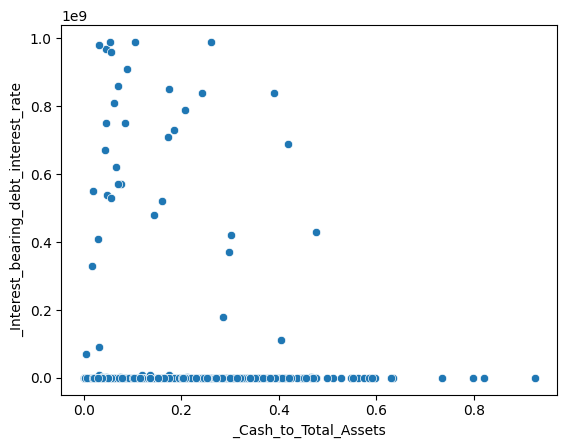

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing your data
sns.scatterplot(x=df["_Cash_to_Total_Assets"], y=df["_Interest_bearing_debt_interest_rate"])
plt.show()

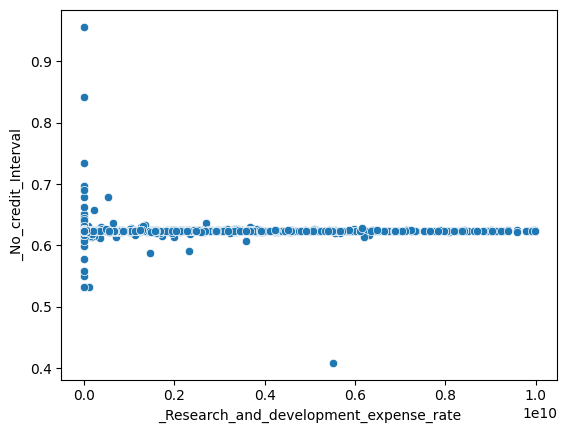

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
sns.scatterplot(x=df["_Research_and_development_expense_rate"], y=df["_No_credit_Interval"])
plt.show()

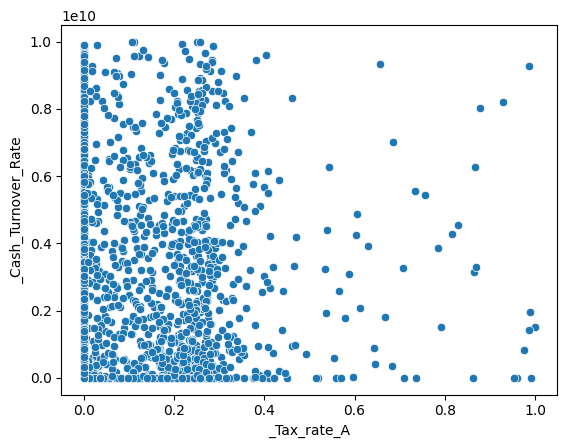

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
sns.scatterplot(x=df["_Tax_rate_A"], y=df["_Cash_Turnover_Rate"])
plt.show()

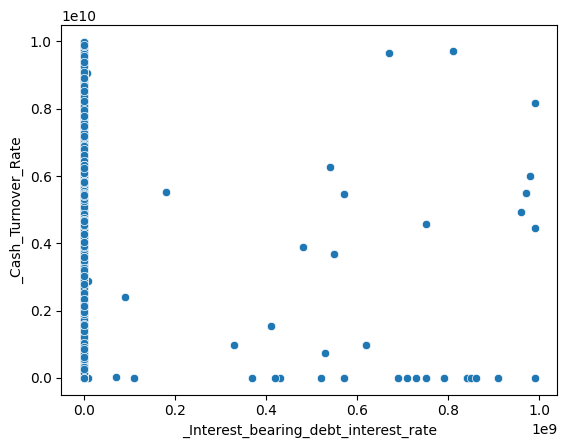

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
sns.scatterplot(x=df["_Interest_bearing_debt_interest_rate"], y=df["_Cash_Turnover_Rate"])
plt.show()

In [47]:
corr_mat = df.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending= False)
  
sorted_mat.head()

_Operating_Expense_Rate           _Operating_Expense_Rate             1.0
_Quick_Assets_to_Total_Assets     _Quick_Assets_to_Total_Assets       1.0
_Net_Worth_Turnover_Rate_times    _Net_Worth_Turnover_Rate_times      1.0
_Fixed_Assets_Turnover_Frequency  _Fixed_Assets_Turnover_Frequency    1.0
_Inventory_Turnover_Rate_times    _Inventory_Turnover_Rate_times      1.0
dtype: float64